<a href="https://colab.research.google.com/github/hatimchamss/PRODIGY_ML_01/blob/main/PRODIGY_ML_01_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hatimrajaa","key":"6bc3a61dd8bb0c59feb963ae74a7ddc2"}'}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle dataset list

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'models', 'm', 'files', 'f', 'config')


In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 85.6MB/s]


In [ ]:
!unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
!ls

 data_description.txt				   kaggle.json		   test.csv
 house-prices-advanced-regression-techniques.zip   sample_data		   train.csv
'kaggle (1).json'				   sample_submission.csv


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
811,812,120,RM,NaN,4438,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,ConLD,Normal,144500
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
91,92,20,RL,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,98600
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
31,32,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350
626,627,20,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,600,8,2007,WD,Normal,139900
188,189,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,153337
526,527,20,RL,70.0,13300,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,132000
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000
1244,1245,70,RL,NaN,11435,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,230000


In [ ]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
len(df)

1460

<Axes: ylabel='Frequency'>

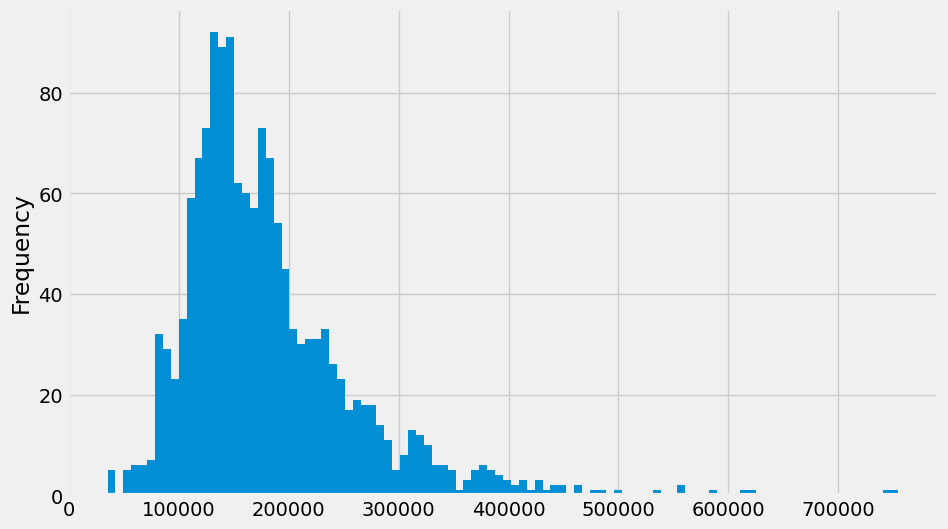

In [ ]:
df.SalePrice.plot.hist(bins=100)

<Axes: >

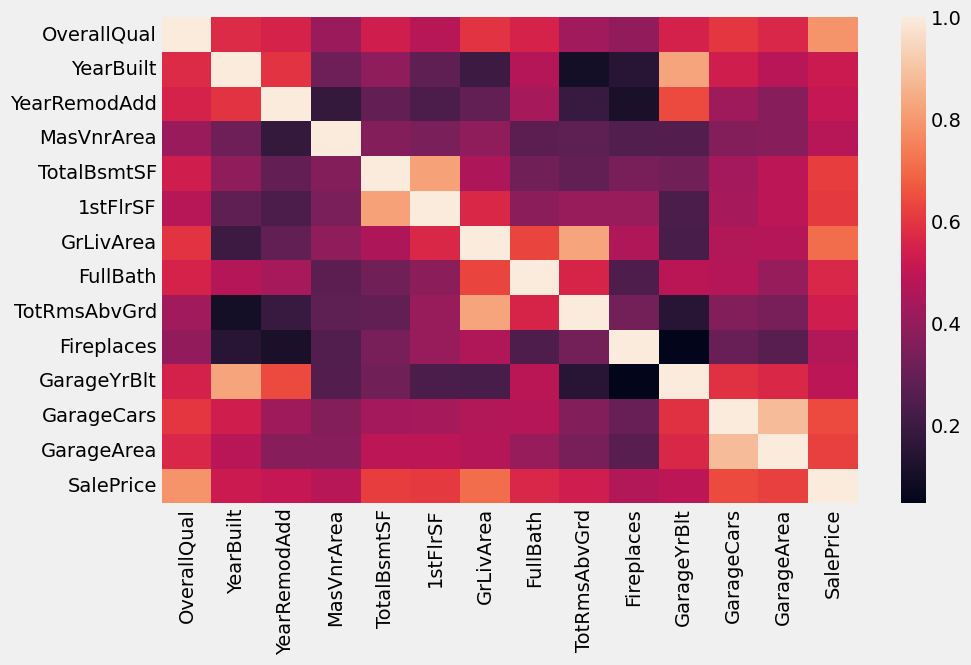

In [ ]:
corr_mat = df.corr(numeric_only=True)
price_corr = corr_mat['SalePrice']
top_corr_features = price_corr[price_corr.abs() > 0.4 ].index

sns.heatmap(corr_mat.loc[top_corr_features , top_corr_features])

In [ ]:
price_corr[price_corr.abs() > 0.4 ].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

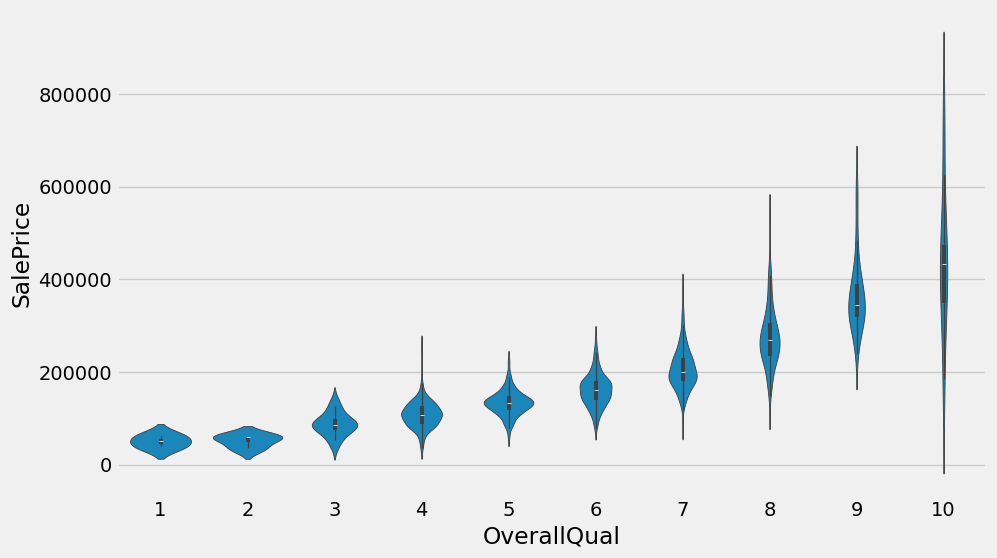

In [ ]:
sns.violinplot(x='OverallQual', y='SalePrice', data=df)

<Axes: ylabel='Frequency'>

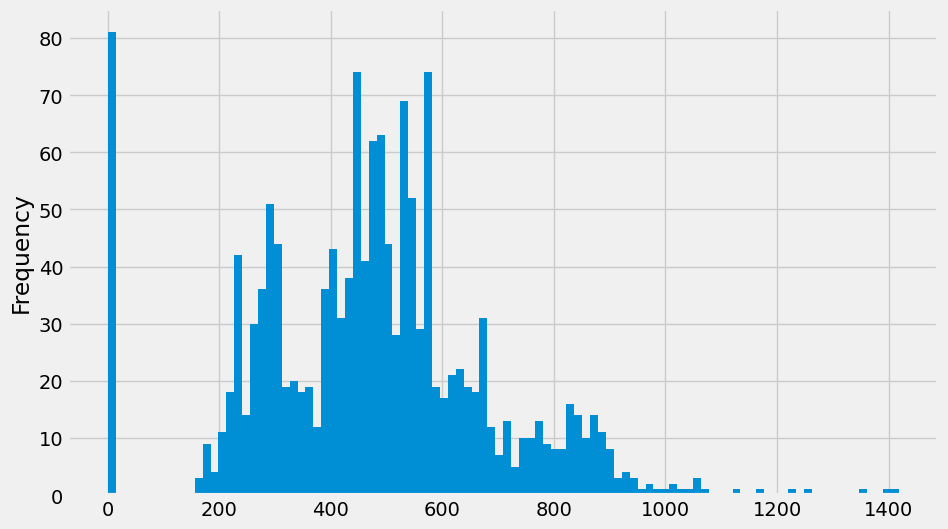

In [ ]:
df.GarageArea.plot.hist(bins=100)

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

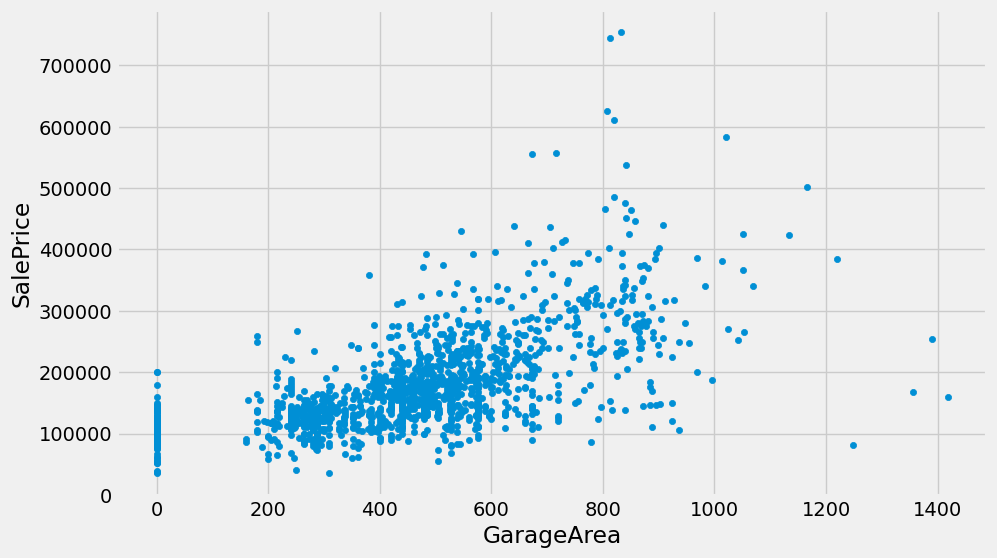

In [ ]:
plt.rcParams['figure.figsize' ] = (10, 6)
df.plot.scatter(x='GarageArea', y='SalePrice')

##pre-processing.
# New Section

<Axes: ylabel='Frequency'>

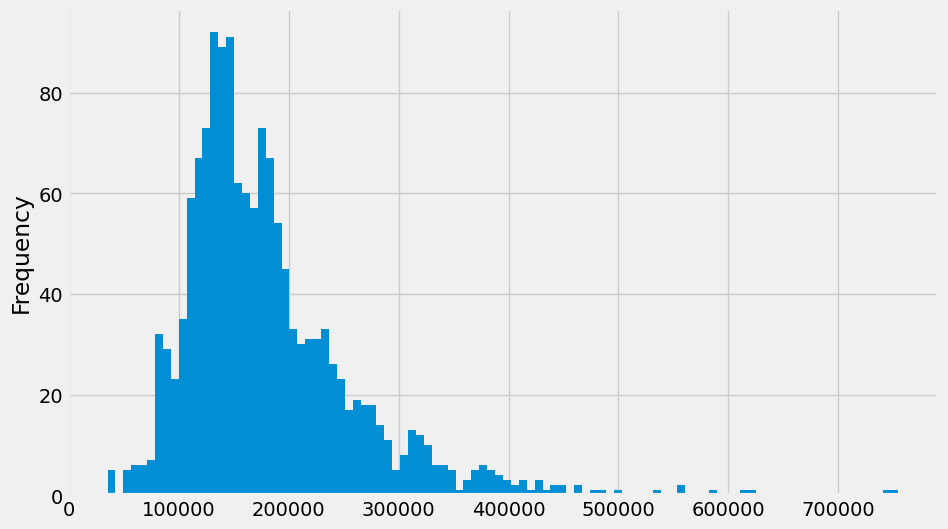

In [ ]:
df.SalePrice.plot.hist(bins=100)

<Axes: ylabel='Frequency'>

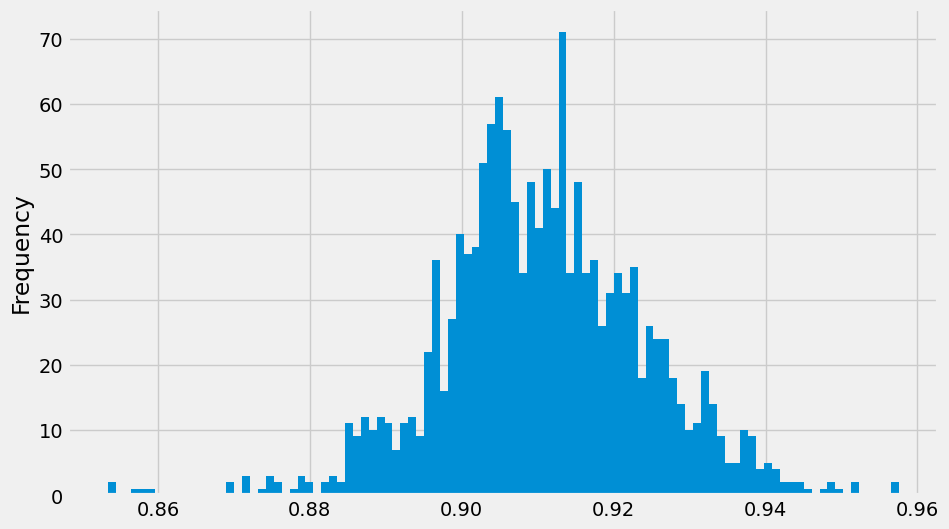

In [ ]:
df['SalePriceLog'] = np.log(df.SalePrice)
df.SalePriceLog.plot.hist(bins=100)

In [ ]:
cat_variables = df.select_dtypes(include=['object']).columns
cat_df = pd.get_dummies(df[cat_variables])
cat_df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
num_df = df[[c for c in df if c not in cat_variables]]
num_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePricelog,SalePrice log,SalePrice_log,SalePriceLog
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,2,2008,2.505338,0.918424,0.918424,0.918424,0.918424
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,5,2007,2.493950,0.913868,0.913868,0.913868,0.913868
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,9,2008,2.510994,0.920679,0.920679,0.920679,0.920679
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,2,2006,2.472277,0.905140,0.905140,0.905140,0.905140
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,12,2008,2.520050,0.924279,0.924279,0.924279,0.924279


In [ ]:
joined_df = pd.concat([cat_df, num_df], axis=1)

In [ ]:
joined_df.head(3).T

,0,1,2
MSZoning_C (all),False,False,False
MSZoning_FV,False,False,False
MSZoning_RH,False,False,False
MSZoning_RL,True,True,True
MSZoning_RM,False,False,False
...,...,...,...
SalePrice,2.505338,2.49395,2.510994
SalePricelog,0.918424,0.913868,0.920679
SalePrice log,0.918424,0.913868,0.920679
SalePrice_log,0.918424,0.913868,0.920679


<Axes: ylabel='Frequency'>

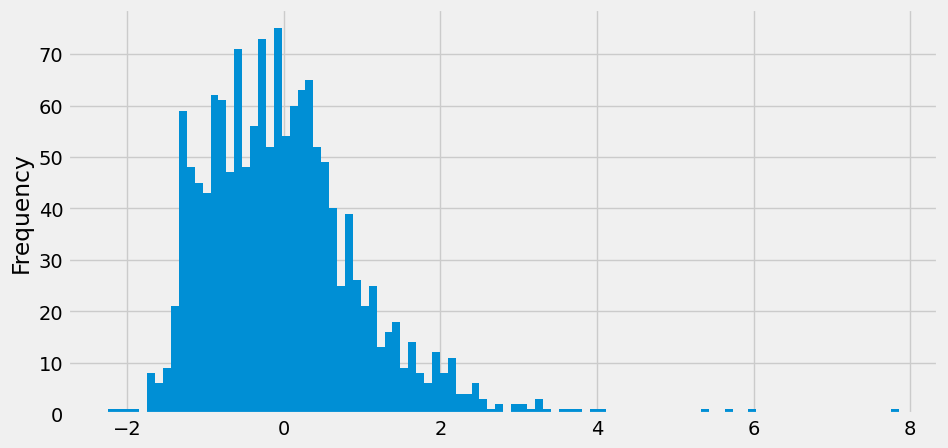

In [ ]:
values = joined_df.GrLivArea
values = (values - values.mean()) / values.std()

values.plot.hist(bins=100)

##Modeling


In [ ]:
joined_df.sample(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePricelog,SalePrice log,SalePrice_log,SalePriceLog
17,False,False,False,True,False,False,True,False,False,False,...,0,0,500,10,2006,2.434277,0.889650,0.889650,0.889650,0.889650
1130,False,False,False,True,False,False,True,False,False,False,...,0,0,0,12,2009,2.469203,0.903895,0.903895,0.903895,0.903895
686,False,True,False,False,False,False,True,False,False,False,...,0,0,0,8,2007,2.512567,0.921305,0.921305,0.921305,0.921305


In [ ]:
from sklearn.preprocessing import normalize
features_df = joined_df.copy().fillna(0.0)
#features_df = joined_df[['OverallQual', 'GrLivArea', 'SalePriceLog']].copy()
#features_df['GrLivArea'] = (features_df.GrLivArea - features_df.GrLivArea.mean()) / features_df.GrLivArea.std()

target = features_df.pop('SalePriceLog')
del features_df['SalePrice']
features_df.sample(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePricelog,SalePrice log,SalePrice_log
100,False,False,False,True,False,False,True,False,False,True,...,0,0,0,0,0,2,2010,0.917871,0.917871,0.917871
1109,False,False,False,True,False,False,True,False,False,True,...,0,0,0,0,0,3,2009,0.927874,0.927874,0.927874
184,False,False,False,True,False,False,True,False,False,True,...,0,0,0,0,0,6,2006,0.901794,0.901794,0.901794


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.25, random_state=0)

In [ ]:
from sklearn.dummy import DummyRegressor
baseline = DummyRegressor(strategy='mean')
baseline.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_test, baseline.predict(x_test)))

0.012782943056785956

In [ ]:
from sklearn.linear_model import LinearRegression, LassoCV , RidgeCV

model = RidgeCV()
model.fit(x_train, y_train)

RidgeCV()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.005433790703243292

In [ ]:
model.coef_

array([-1.05836950e-02,  3.68584336e-03,  2.16347517e-03,  2.79405044e-03,
        1.94032599e-03, -1.59852702e-03,  1.59852702e-03, -1.92294943e-04,
        1.17177989e-03, -3.32960227e-04,  1.89458226e-04,  3.88628837e-04,
       -2.45126836e-04,  1.30916116e-04,  2.59134522e-04, -7.92194131e-04,
        4.02143493e-04,  2.77837075e-03, -2.77837075e-03,  1.03541297e-03,
        1.60737858e-03,  5.13848998e-04, -3.92417482e-03,  7.67534280e-04,
        1.25097422e-03,  1.75377078e-03, -3.00474500e-03,  1.09081707e-03,
       -5.55493820e-04, -1.61167431e-03,  2.55131613e-04,  1.61888449e-03,
       -1.40446063e-05,  3.32366710e-03, -1.83041034e-03,  1.12039853e-04,
       -1.58219781e-03, -4.46572649e-03, -1.37032125e-03, -8.13262056e-04,
        7.61732900e-04, -4.46402737e-04,  7.25721146e-04,  1.51371037e-03,
       -1.70691661e-03,  9.57214262e-05, -7.31892092e-04,  1.32238019e-04,
        5.90655442e-04,  2.79228559e-03,  1.40193396e-04,  1.97554370e-03,
       -9.38357198e-04, -

In [ ]:
model.intercept_

0.8843169580797403

Text(0.5, 0, 'Predicted price')

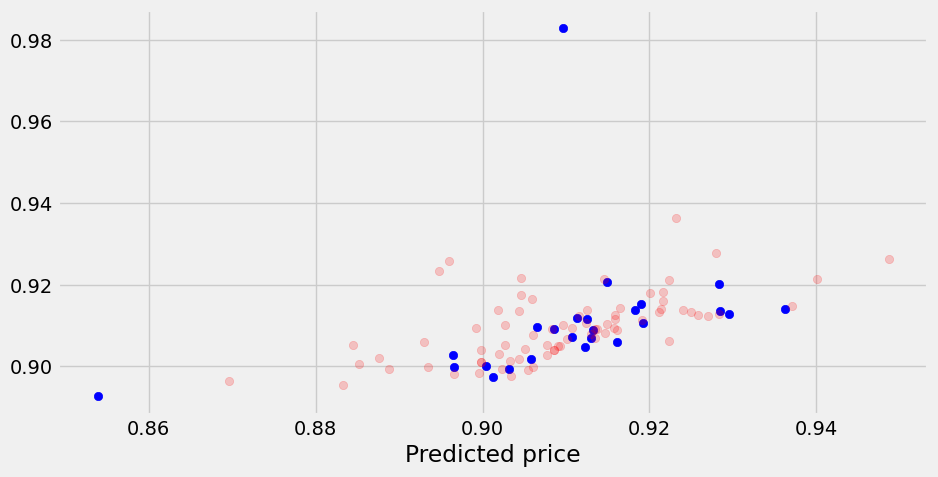

In [ ]:
plt.scatter(y_test, y_pred, c='b')
plt.scatter(y_train, model.predict(x_train), c='r', alpha=0.2)
plt.xlabel("Sale price")
plt.xlabel("Predicted price")